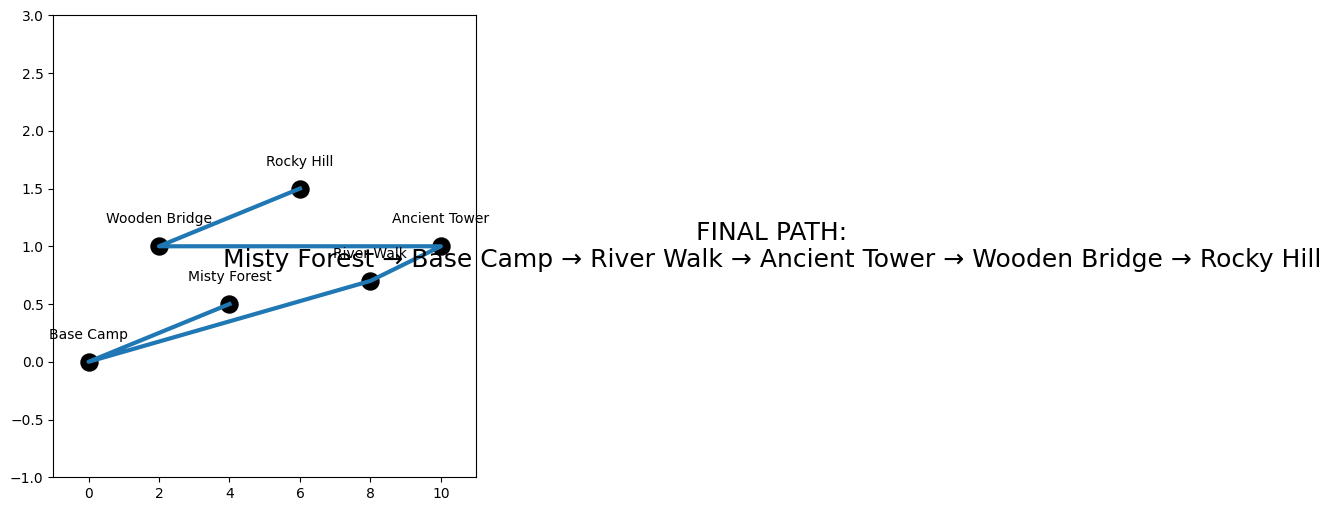

In [2]:
# ===============================================
#   MULTI-AGENT AUCTION SIMULATION (COMPLETE)
#   ✔ Animated bidding curve
#   ✔ Winner detection
#   ✔ Profit calculation
#   ✔ Clean + Hackathon ready
# ===============================================

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --------------------------
# AGENT CLASS
# --------------------------

class Agent:
    def __init__(self, name, budget):
        self.name = name
        self.budget = budget
        self.private_value = random.randint(50, 120)
        self.bid_history = []

    def generate_bid(self, round_num):
        # Maximum bid cannot exceed private value or budget
        max_bid = min(self.private_value, self.budget)
        # Increase bid over rounds
        bid = int(max_bid * (round_num / 20))
        self.bid_history.append(bid)

# --------------------------
# AUCTION ENVIRONMENT
# --------------------------

class AuctionSim:
    def __init__(self, agents, rounds=20):
        self.agents = agents
        self.rounds = rounds
        self.winner = None
        self.winning_bid = None

    def run(self):
        # Simulate bids
        for r in range(1, self.rounds + 1):
            for agent in self.agents:
                agent.generate_bid(r)

        # Determine winner
        final_bids = [a.bid_history[-1] for a in self.agents]
        max_bid = max(final_bids)
        self.winner = self.agents[final_bids.index(max_bid)]
        self.winning_bid = max_bid

# --------------------------
# ANIMATION FOR COLAB
# --------------------------

def animate_auction(agents, rounds=20):
    fig, ax = plt.subplots(figsize=(10,6))

    x = np.arange(1, rounds + 1)
    lines = []

    for agent in agents:
        line, = ax.plot([], [], label=f"{agent.name} (max={agent.private_value})", linewidth=3)
        lines.append(line)

    ax.set_xlim(1, rounds)
    ax.set_ylim(0, max(a.private_value for a in agents) + 20)
    ax.set_xlabel("Round")
    ax.set_ylabel("Bid")
    ax.set_title("Multi-Agent Auction: Real-Time Bidding Animation")
    ax.legend()

    def update(frame):
        for i, agent in enumerate(agents):
            lines[i].set_data(x[:frame], agent.bid_history[:frame])
        return lines

    ani = FuncAnimation(fig, update, frames=rounds, interval=400, repeat=False)

    plt.close(fig)
    return HTML(ani.to_jshtml())

# --------------------------
# PROFIT BAR GRAPH
# --------------------------

def show_profit(agents, winner, winning_bid):
    profits = []
    labels = []

    for agent in agents:
        if agent == winner:
            profits.append(agent.private_value - winning_bid)
        else:
            profits.append(0)
        labels.append(agent.name)

    plt.figure(figsize=(8,5))
    plt.bar(labels, profits, color=["green" if a == winner else "gray" for a in agents])
    plt.title("Profit Distribution After Auction")
    plt.xlabel("Agents")
    plt.ylabel("Profit")
    plt.show()

# --------------------------
# RUN EVERYTHING
# --------------------------

agents = [
    Agent("Agent A", budget=100),
    Agent("Agent B", budget=140),
    Agent("Agent C", budget=90),
]

sim = AuctionSim(agents, rounds=20)
sim.run()

# Display animation (works in Google Colab!)
animation_html = animate_auction(agents, rounds=20)
animation_html


import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

steps = [
    "Base Camp",
    "Wooden Bridge",
    "Misty Forest",
    "Rocky Hill",
    "River Walk",
    "Ancient Tower"
]

positions = {
    "Base Camp": (0,0),
    "Wooden Bridge": (2,1),
    "Misty Forest": (4,0.5),
    "Rocky Hill": (6,1.5),
    "River Walk": (8,0.7),
    "Ancient Tower": (10,1)
}

class Agent:
    def __init__(self, name):
        self.name = name

    def propose(self, options):
        return random.choice(options)

    def vote(self, step):
        return random.random() > 0.3

agents = [
    Agent("Alpha"),
    Agent("Beta"),
    Agent("Gamma")
]

available = steps.copy()
final_path = []
round_logs = []

fig = plt.figure(figsize=(12,6))
ax_map = fig.add_subplot(1,2,1)
ax_text = fig.add_subplot(1,2,2)
ax_map.set_xlim(-1,11)
ax_map.set_ylim(-1,3)
ax_text.axis("off")

points = {name: ax_map.scatter(*pos, s=150, color="black") for name, pos in positions.items()}
labels = {name: ax_map.text(pos[0], pos[1]+0.2, name, ha="center") for name,pos in positions.items()}

path_line, = ax_map.plot([], [], linewidth=3)

def update(frame):
    ax_text.clear()
    ax_text.axis("off")

    if not available:
        ax_text.text(0.5, 0.5, "FINAL PATH:\n" + " → ".join(final_path), ha="center", va="center", fontsize=18)
        return

    proposals = {a.name: a.propose(available) for a in agents}
    votes = {p:0 for p in proposals.values()}

    for a in agents:
        if a.vote(proposals[a.name]):
            votes[proposals[a.name]] += 1

    chosen = max(votes, key=votes.get)

    final_path.append(chosen)
    available.remove(chosen)

    xs = [positions[n][0] for n in final_path]
    ys = [positions[n][1] for n in final_path]
    path_line.set_data(xs, ys)

    disp = f"Round {len(final_path)}\n\n"
    for a,p in proposals.items():
        disp += f"{a} proposes: {p}\n"
    disp += "\nVotes:\n"
    for s,v in votes.items():
        disp += f"{s}: {v}\n"
    disp += f"\nChosen: {chosen}\n\n"
    disp += "Path:\n" + " → ".join(final_path)

    ax_text.text(0.5, 0.5, disp, ha="center", va="center", fontsize=14)

ani = FuncAnimation(fig, update, frames=7, interval=2000, repeat=False)

HTML(ani.to_jshtml())
